In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [4]:
from bsde_solver.bsde import HJB
from bsde_solver.stochastic.path import generate_trajectories

In [14]:
batch_size = 10000
T = 1
N = 100
num_assets = 10
dt = T / N

In [15]:
X0 = np.zeros(num_assets) # initial condition
# X0 = np.random.normal(0, 1, num_assets) # initial condition

model = HJB(X0, dt, T)

X, noise = generate_trajectories(batch_size, N, num_assets, X0, model, dt) # (batch_size, N + 1, num_assets)

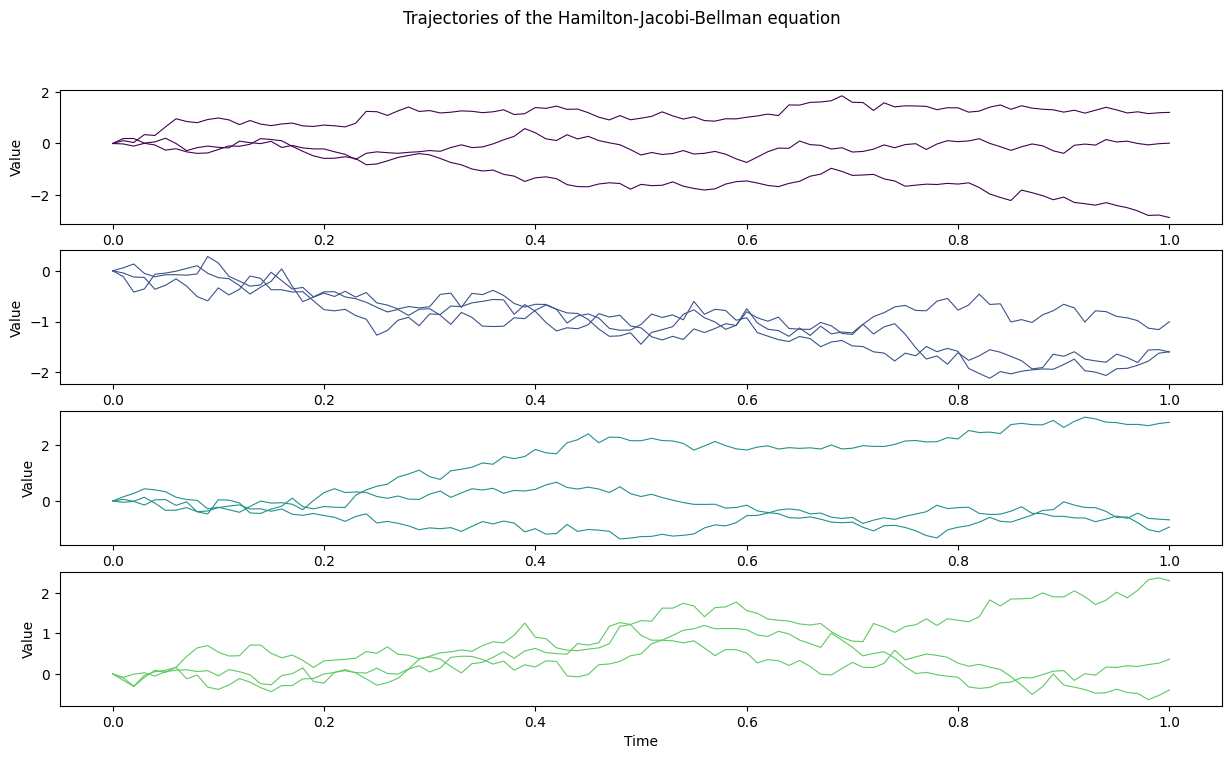

In [16]:
plt.figure(figsize=(15, 8), dpi=100)
colormap = plt.cm.viridis
time_range = np.linspace(0, T, N + 1)
sub_batch_size = 4
for i in range(sub_batch_size):
    plt.subplot(sub_batch_size, 1, i + 1)
    plt.plot(time_range, X[i, :, 0], color=colormap(i / sub_batch_size), lw=0.8)
    plt.plot(time_range, X[i, :, 1], color=colormap(i / sub_batch_size), lw=0.8)
    plt.plot(time_range, X[i, :, 2], color=colormap(i / sub_batch_size), lw=0.8)
    plt.xlabel("Time")
    plt.ylabel("Value")
plt.suptitle("Trajectories of the Hamilton-Jacobi-Bellman equation")
plt.show()

In [64]:
def compute_price(X, T, t, i):
    '''Compute HJB close form solution'''
    X_T = np.sqrt(2 * (T - t)) * np.random.randn(X.shape[0], X.shape[1]) + X.repeat(1, 0)
    return -np.log(np.mean(2 / (1 + np.sum(X_T**2, 1))))

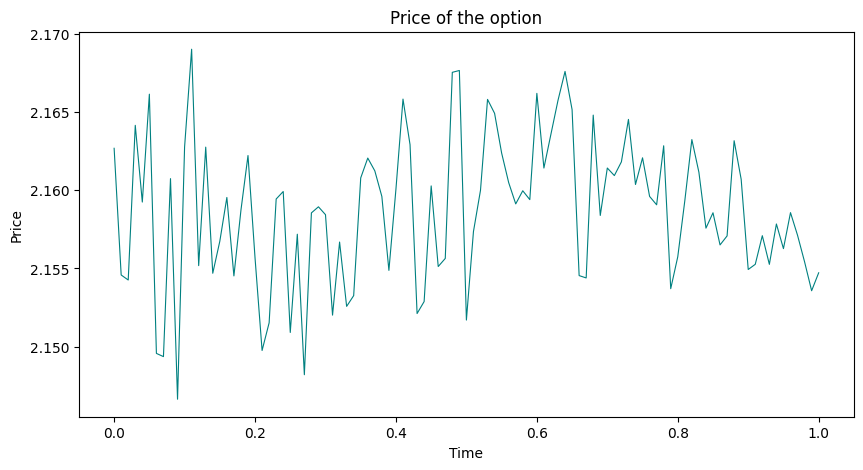

In [81]:
prices = []
for i in range(N + 1):
    prices.append(compute_price(X[:, i, :], T, i * dt, i))

plt.figure(figsize=(10, 5))
plt.plot(time_range, prices, lw=0.8, color='teal')
# plt.scatter([1], [np.mean(model.g(X[:, -1, :]))], color='red', label="Monte Carlo")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price of the option")
plt.show()

In [66]:
prices[0]

2.1650874614799323

In [67]:
model = HJB(X0, dt, T)

In [68]:
compute_price(X[:, 0, :], T, 0, 0)

2.1506036931539723

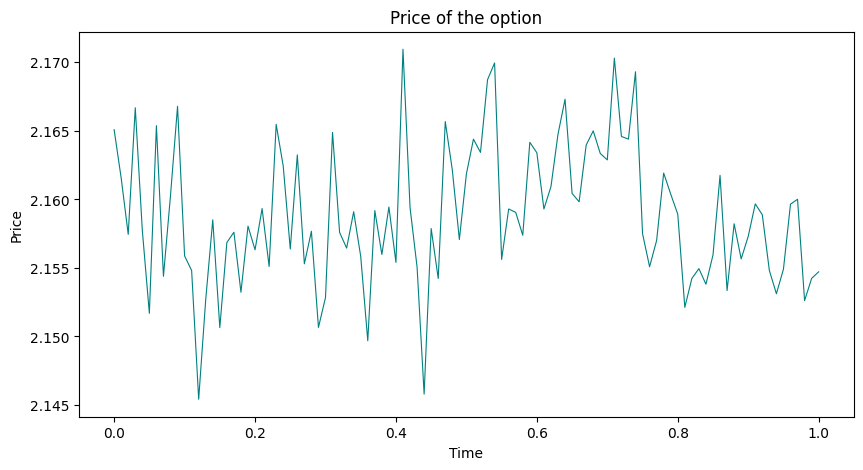

In [70]:
plt.figure(figsize=(10, 5))
plt.plot(time_range, prices, lw=0.8, color='teal')
# plt.scatter([1], [np.mean(model.g(X[:, -1, :]))], color='red', label="Monte Carlo")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price of the option")
plt.show()

In [2]:
A = [2.2690681288824015, 2.269073720788158, 2.2690796703106497, 2.269085473363234, 2.2690913556483183, 2.269097273473404, 2.2691031321185373, 2.2691091594377704, 2.26911531879028, 2.2691214000773, 2.2691274199902565, 2.269133405240677, 2.2691394134520326, 2.269145374672415, 2.2691514016420786, 2.269157466038986, 2.269163506057894, 2.2691695080154024, 2.2691755048461038, 2.2691814970745012, 2.26918762134552, 2.2691938672491805, 2.26920012986466, 2.2692064907631737, 2.2692128249670587, 2.2692192617279283, 2.2692256663662405, 2.269232046892367, 2.269238434916279, 2.269244843763104, 2.269251280233577, 2.2692578787033417, 2.2692644799489337, 2.269271251963002, 2.269278112279817, 2.2692851019584106, 2.269292088398502, 2.2692991446389716, 2.2693061340313188, 2.2693132891983536, 2.2693204547831973, 2.2693276414795123, 2.269334937715083, 2.269342447281222, 2.269349972602414, 2.269357675004755, 2.2693654758116932, 2.2693734320598242, 2.2693814591001242, 2.2693895491479004, 2.269397889161726, 2.2694064962947804, 2.2694152664541023, 2.269424458097214, 2.2694330266251064, 2.269441821171934, 2.269450267219838, 2.269458448629579, 2.269466685636399, 2.2694750096529908, 2.269483533187403, 2.2694928697925825, 2.269501907558021, 2.2695109204906694, 2.269520195576298, 2.269530666289067, 2.269542022758091, 2.2695539476620294, 2.2695666360773954, 2.2695799341324903, 2.269594508079028, 2.269609381503662, 2.269623652493219, 2.2696410605880617, 2.269655809027326, 2.269667870691009, 2.2696793813634915, 2.2696911595682736, 2.2697034020359186, 2.26971552626417, 2.2697283081734487, 2.2697412768785017, 2.269754053416749, 2.2697674962723986, 2.2697813637871076, 2.269795353373804, 2.269809599789032, 2.2698239110478635, 2.269838471874415, 2.26985268606071, 2.2698662384806605, 2.269879599997975, 2.26990515399416, 2.269919420602245, 2.269938482516805, 2.269981406946284, 2.270006699419866, 2.2700682106284042, 2.270133899363677, 2.270464946299282, 2.2708094686633897]

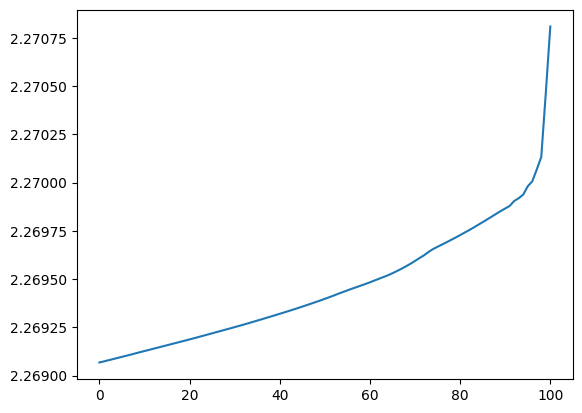

In [3]:
plt.plot(A)